
# <span style="color:rgb(213,80,0)">Lobster dataset years 2002\-2004.</span>

This file creates Figures 8.8\-8.11.

## Data loading

In [1]:
close all
% nsamp is the number of subsamples to use in the frequentist analysis of first
% year, in order to find initial subset using LMS.
nsamp=3000;
% threshold to be used to increase susbet of good units
threshold=300;
bonflev=0.99; % Bonferroni confidence level to be used for first year
bonflevB=0.99; % Bonferroni confidence level to be used for subsequent years

% Load 2002 Fishery dataset
Fishery2002=load('Fishery2002.txt');
y02=Fishery2002(:,3);
X02=Fishery2002(:,2);
n02=length(y02);
seq02=1:n02;

% Load 2003 Fishery dataset
Fishery2003=load('Fishery2003.txt');
y03=Fishery2003(:,3);
X03=Fishery2003(:,2);
n03=length(y03);
seq03=1:n03;

% Load 2004 Fishery dataset
Fishery2004=load('Fishery2004.txt');
y04=Fishery2004(:,3);
X04=Fishery2004(:,2);
n04=length(y04);
seq04=1:n04;

prin=0;

## Create left panel of Figure 8.8


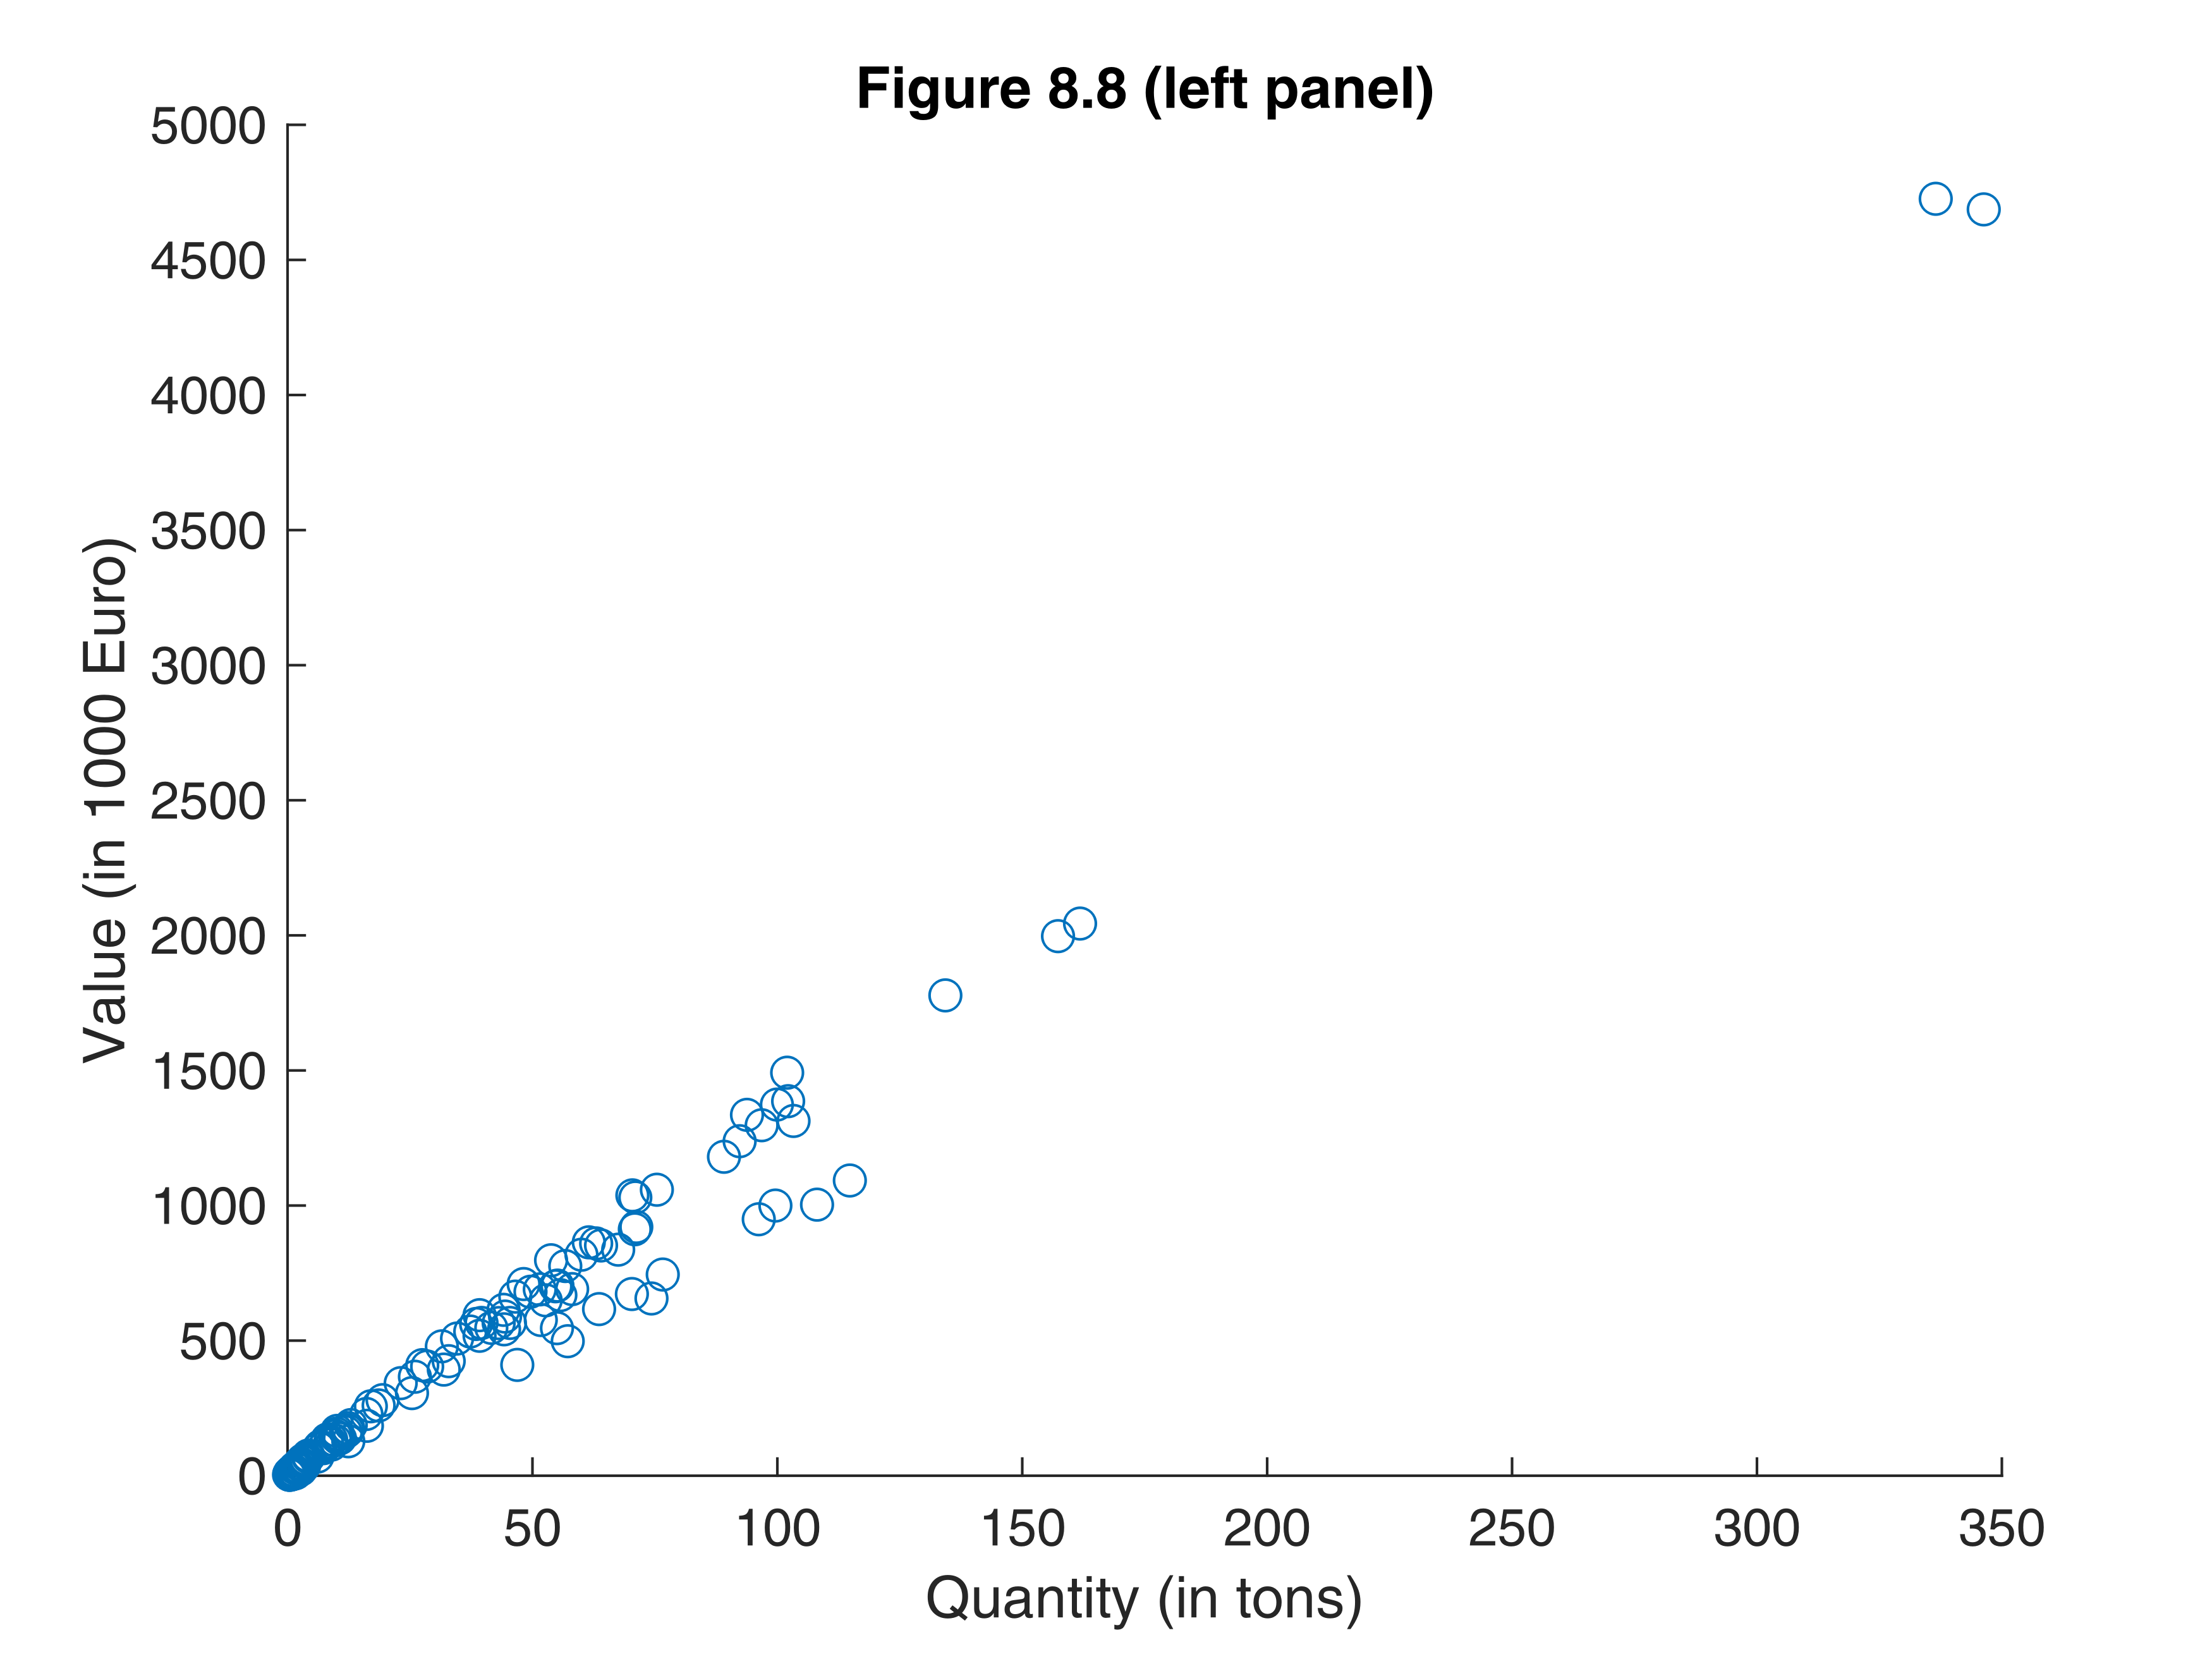

In [2]:
scatter(X02,y02)
xlabel('Quantity (in tons)');
ylabel('Value (in 1000 Euro)');
if prin ==1
    print -depsc  FSdata2002.eps
else
    set(gcf,'Name', 'Figure 8.8 (left panel)');
    title('Figure 8.8 (left panel)')
end

## Create right panel of Figure 8.8


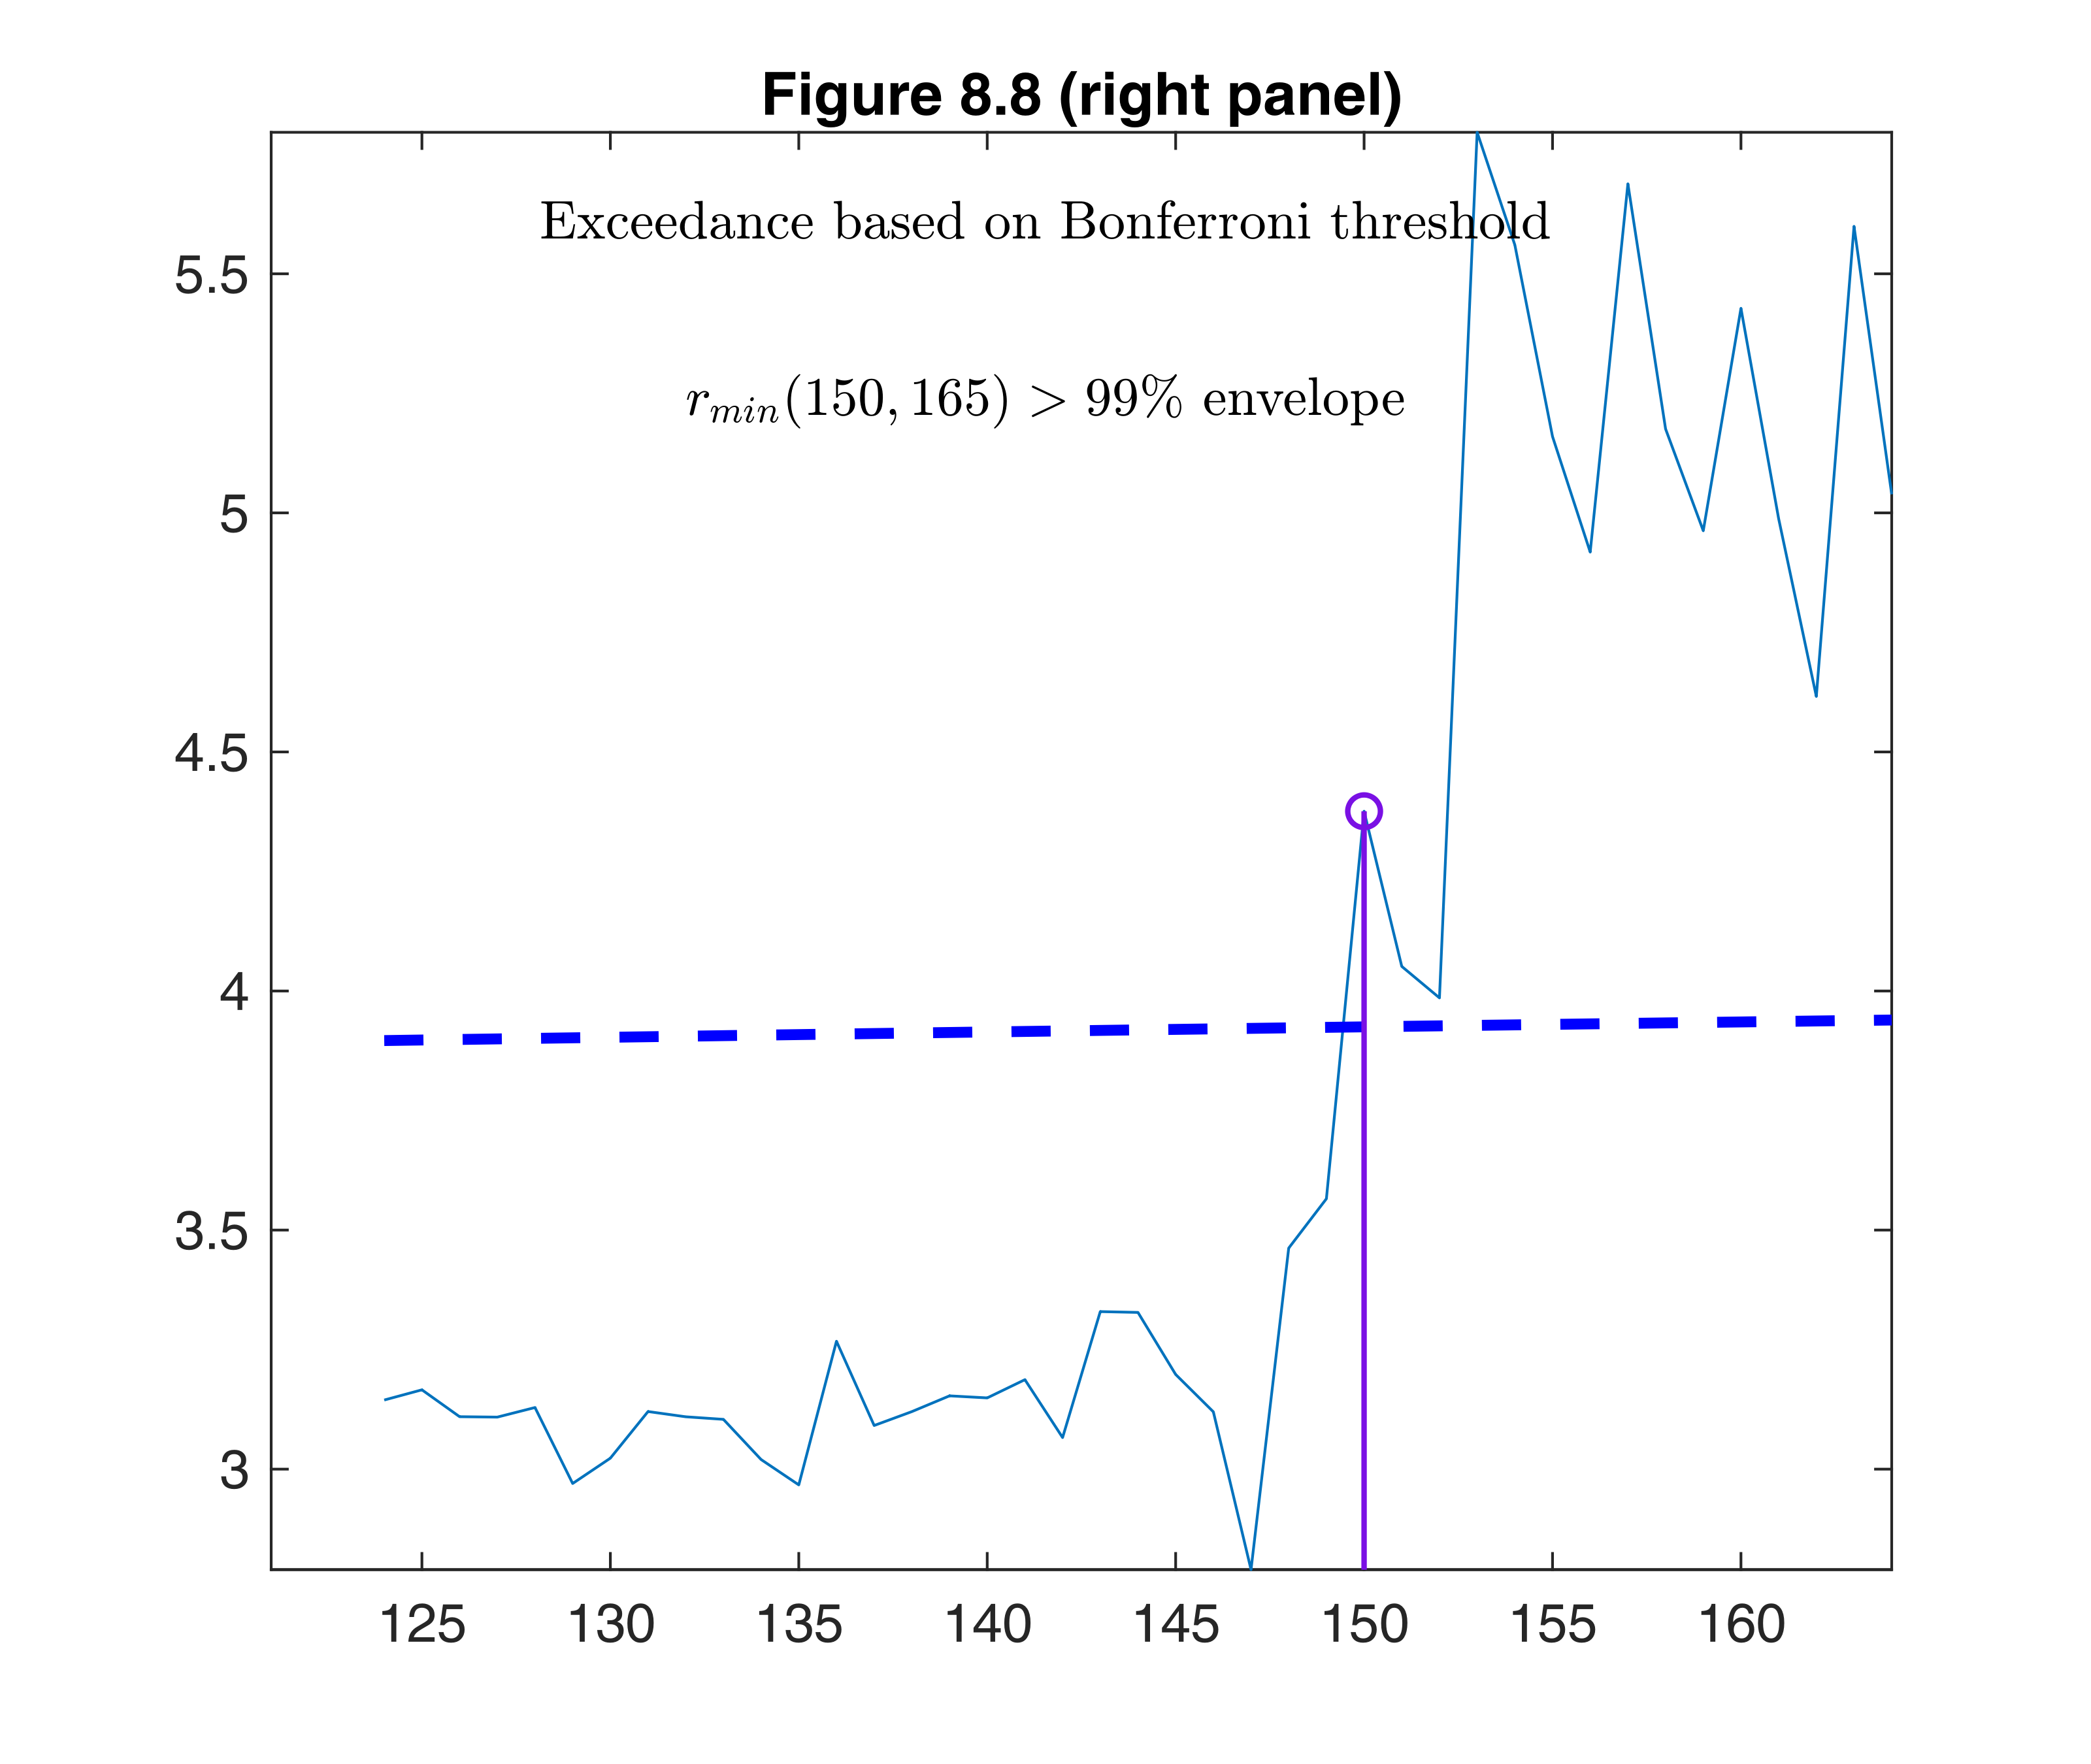

In [3]:
% frequentist Forward Search, 1st year
[out02]=FSR(y02,X02,'nsamp',nsamp,'plots',1,'msg',0,'init',round(n02*3/4),'bonflev',bonflev);

fig=findobj(0,'tag','fsr_yXplot');
close(fig)

fig=findobj(0,'tag','pl_fsr');
figure(fig(1))
if prin ==1
    print -depsc  FSbonf2002.eps
else
    set(gcf,'Name', 'Figure 8.8 (right panel)');
    title('Figure 8.8 (right panel)')
end

## Create Figure 8.9

In what follows g stands for good units i stand for intermediate units (i.e. units whose raw residual is smaller than threshold) o stands for outliers gi stands for good +intermediate units



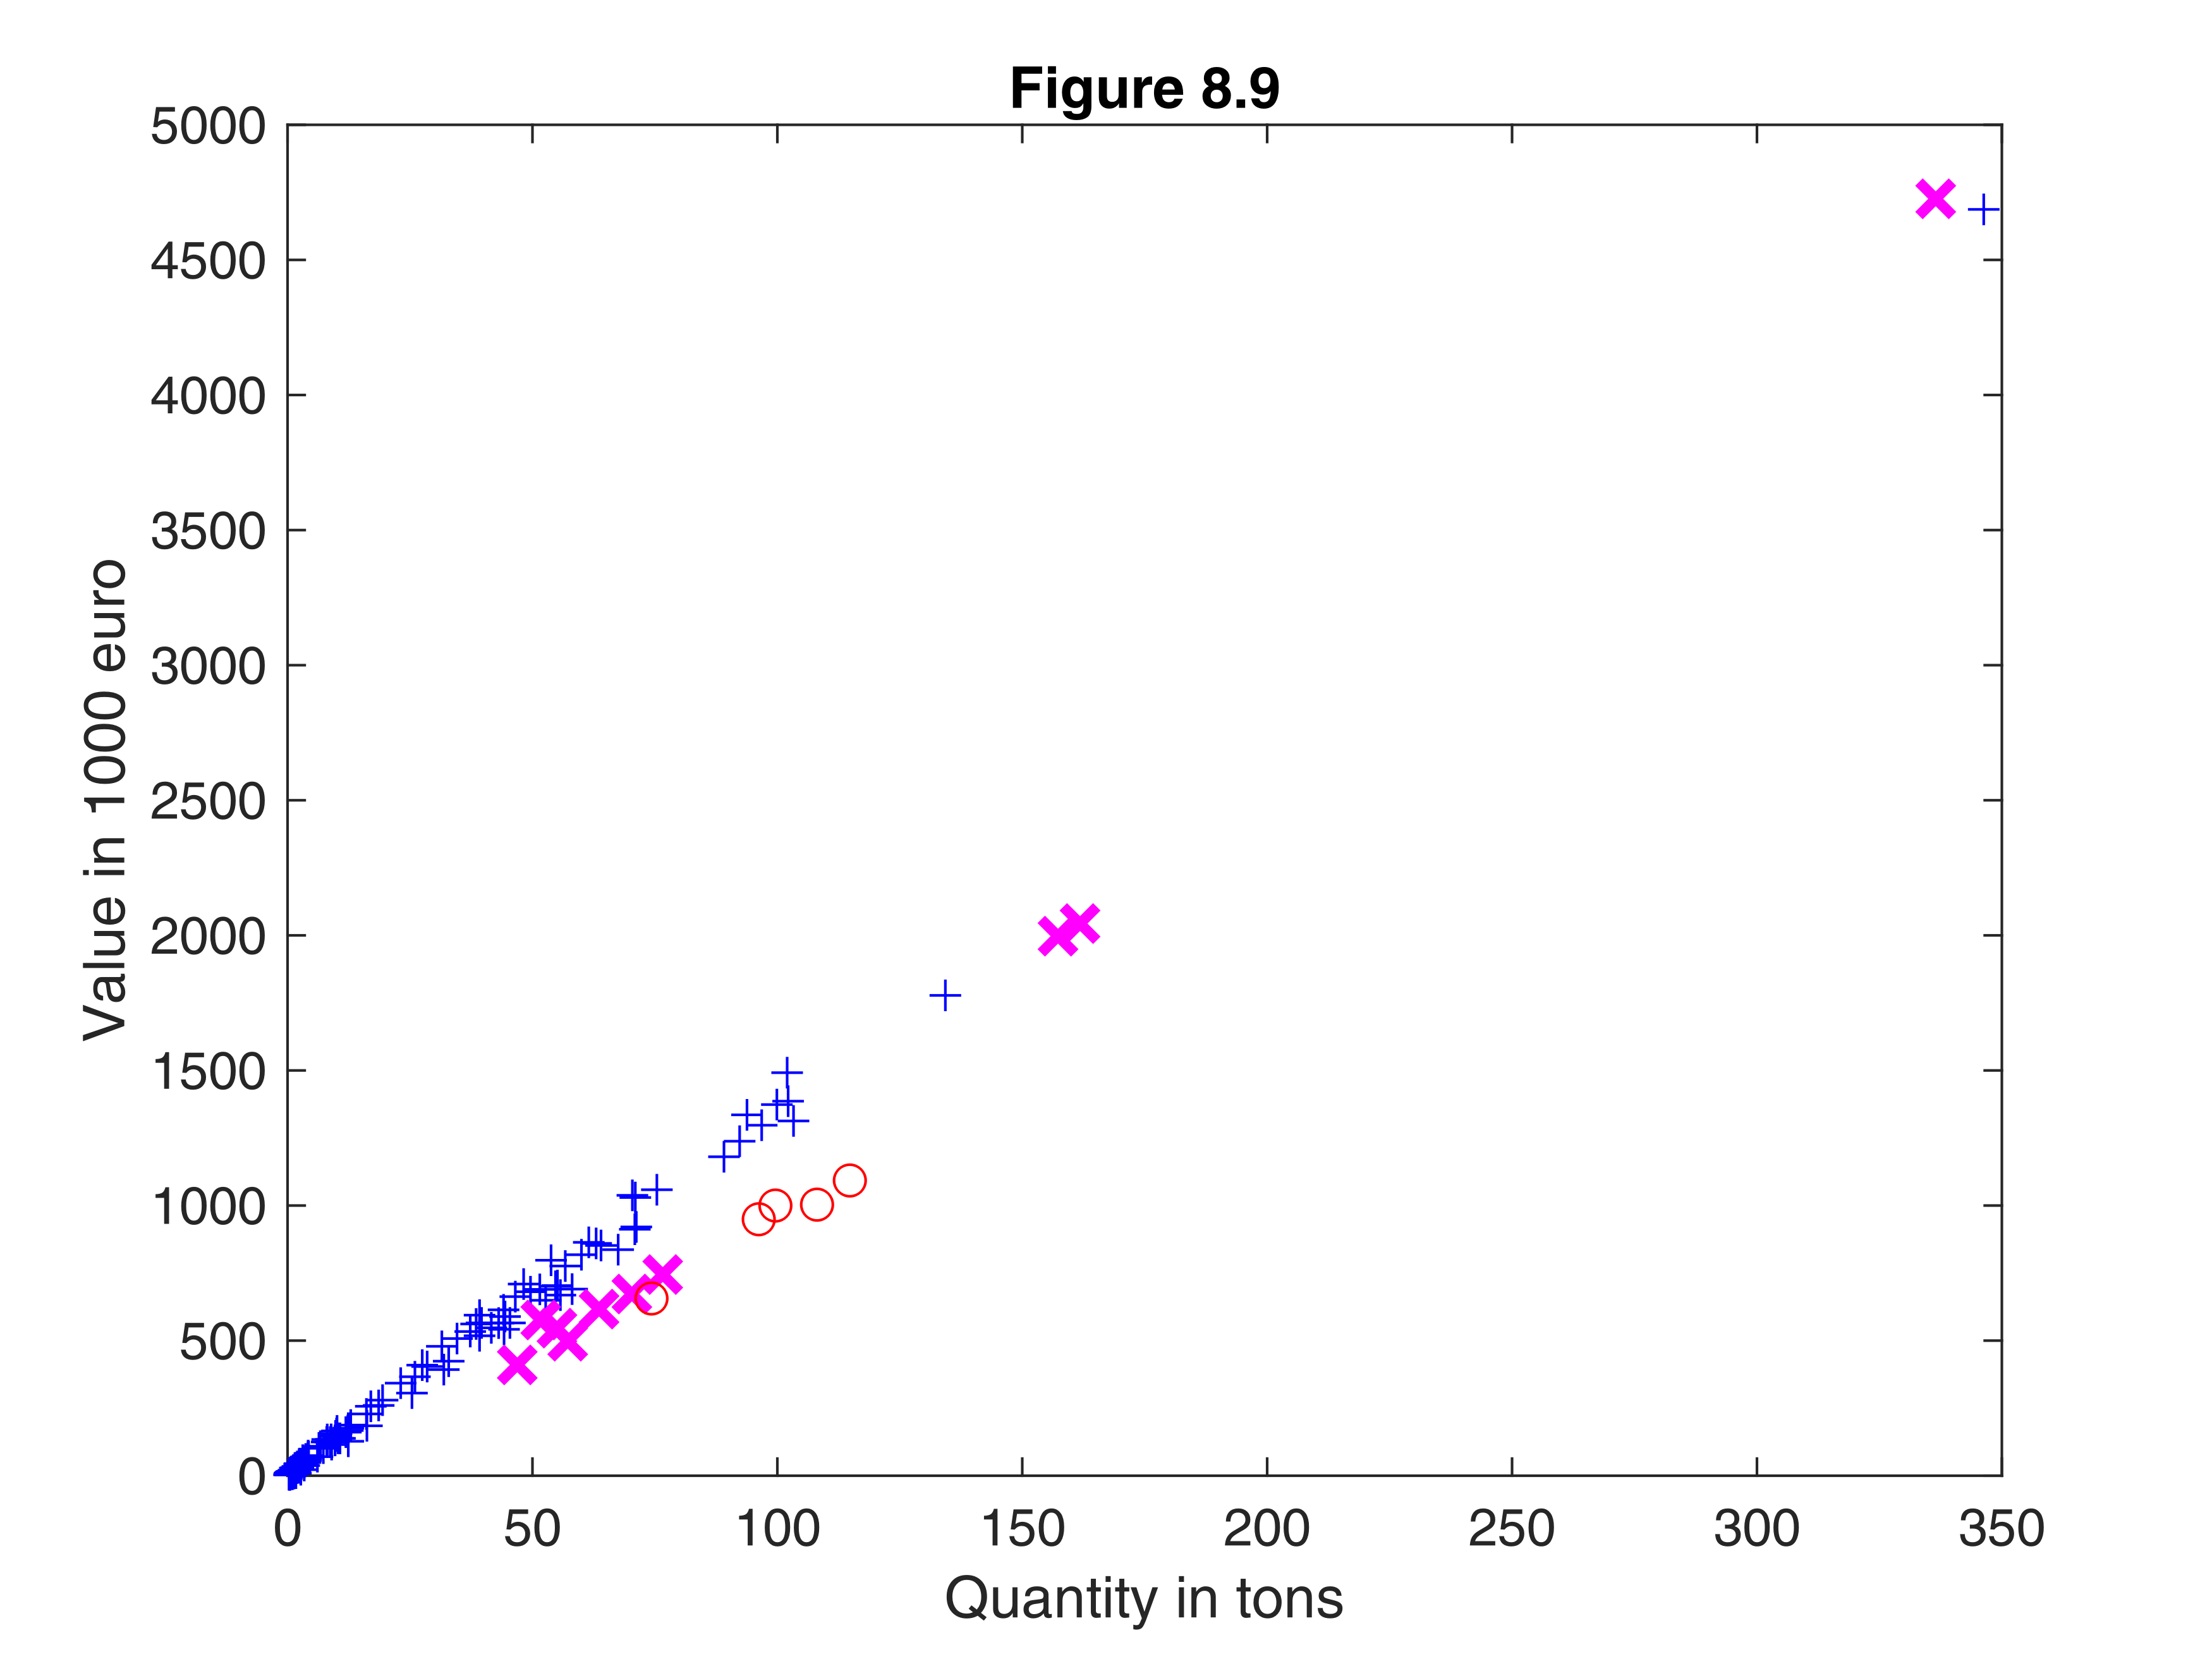

In [4]:
% u02g = good units
% n02g = number of good units
u02g=setdiff(seq02,out02.ListOut);
n02g=length(u02g);

X02g=[ones(length(u02g),1) X02(u02g,:)];
y02g=y02(u02g);
% b02g = regression coefficients just using g units
b02g=X02g\y02g;
% res02 = squared raw residuals for all units using b02g
res02=(y02-[ones(length(X02),1) X02]*b02g).^2;
res02o=res02(out02.ListOut);
% sel= boolean vector which is true for the intermediate units
% (units whose squared residual is below the threshold)
sel=res02o<threshold^2;
% u02i = vector containing intermediate units (that is outliers whose
% residual is smaller than threshold)
u02i=out02.ListOut(sel);
% u02o = vector containing outliers whose residual is out of the threshold
u02o=out02.ListOut(~sel);
% u02gi = g + i units
if ~isempty(u02i)
    u02gi=[u02g u02i];
else
    u02gi=u02g;
end
% n02gi = number of good + intermediate units
n02gi=length(u02gi);

% plotting section
figure
% good units, plotted as (+)
plot(X02(u02g)',y02(u02g)','Marker','+','LineStyle','none','Color','b')
hold('on')
% intermediate units plotted as (X)
plot(X02(u02i)',y02(u02i)','Marker','X','MarkerSize',9,'LineWidth',2,'LineStyle','none','Color','m')

% outliers, plotted as (O)
plot(X02(u02o)',y02(u02o)','Marker','o','LineStyle','none','Color','r')
xlabel('Quantity in tons');
ylabel('Value in 1000 euro');

if prin ==1
    print -depsc  FSres2002.eps
else
    set(gcf,'Name', 'Figure 8.9');
    title('Figure 8.9')
end

## Create Figure 8.10 (left panel)

S202gi = estimated of sigma^2 using g+i units



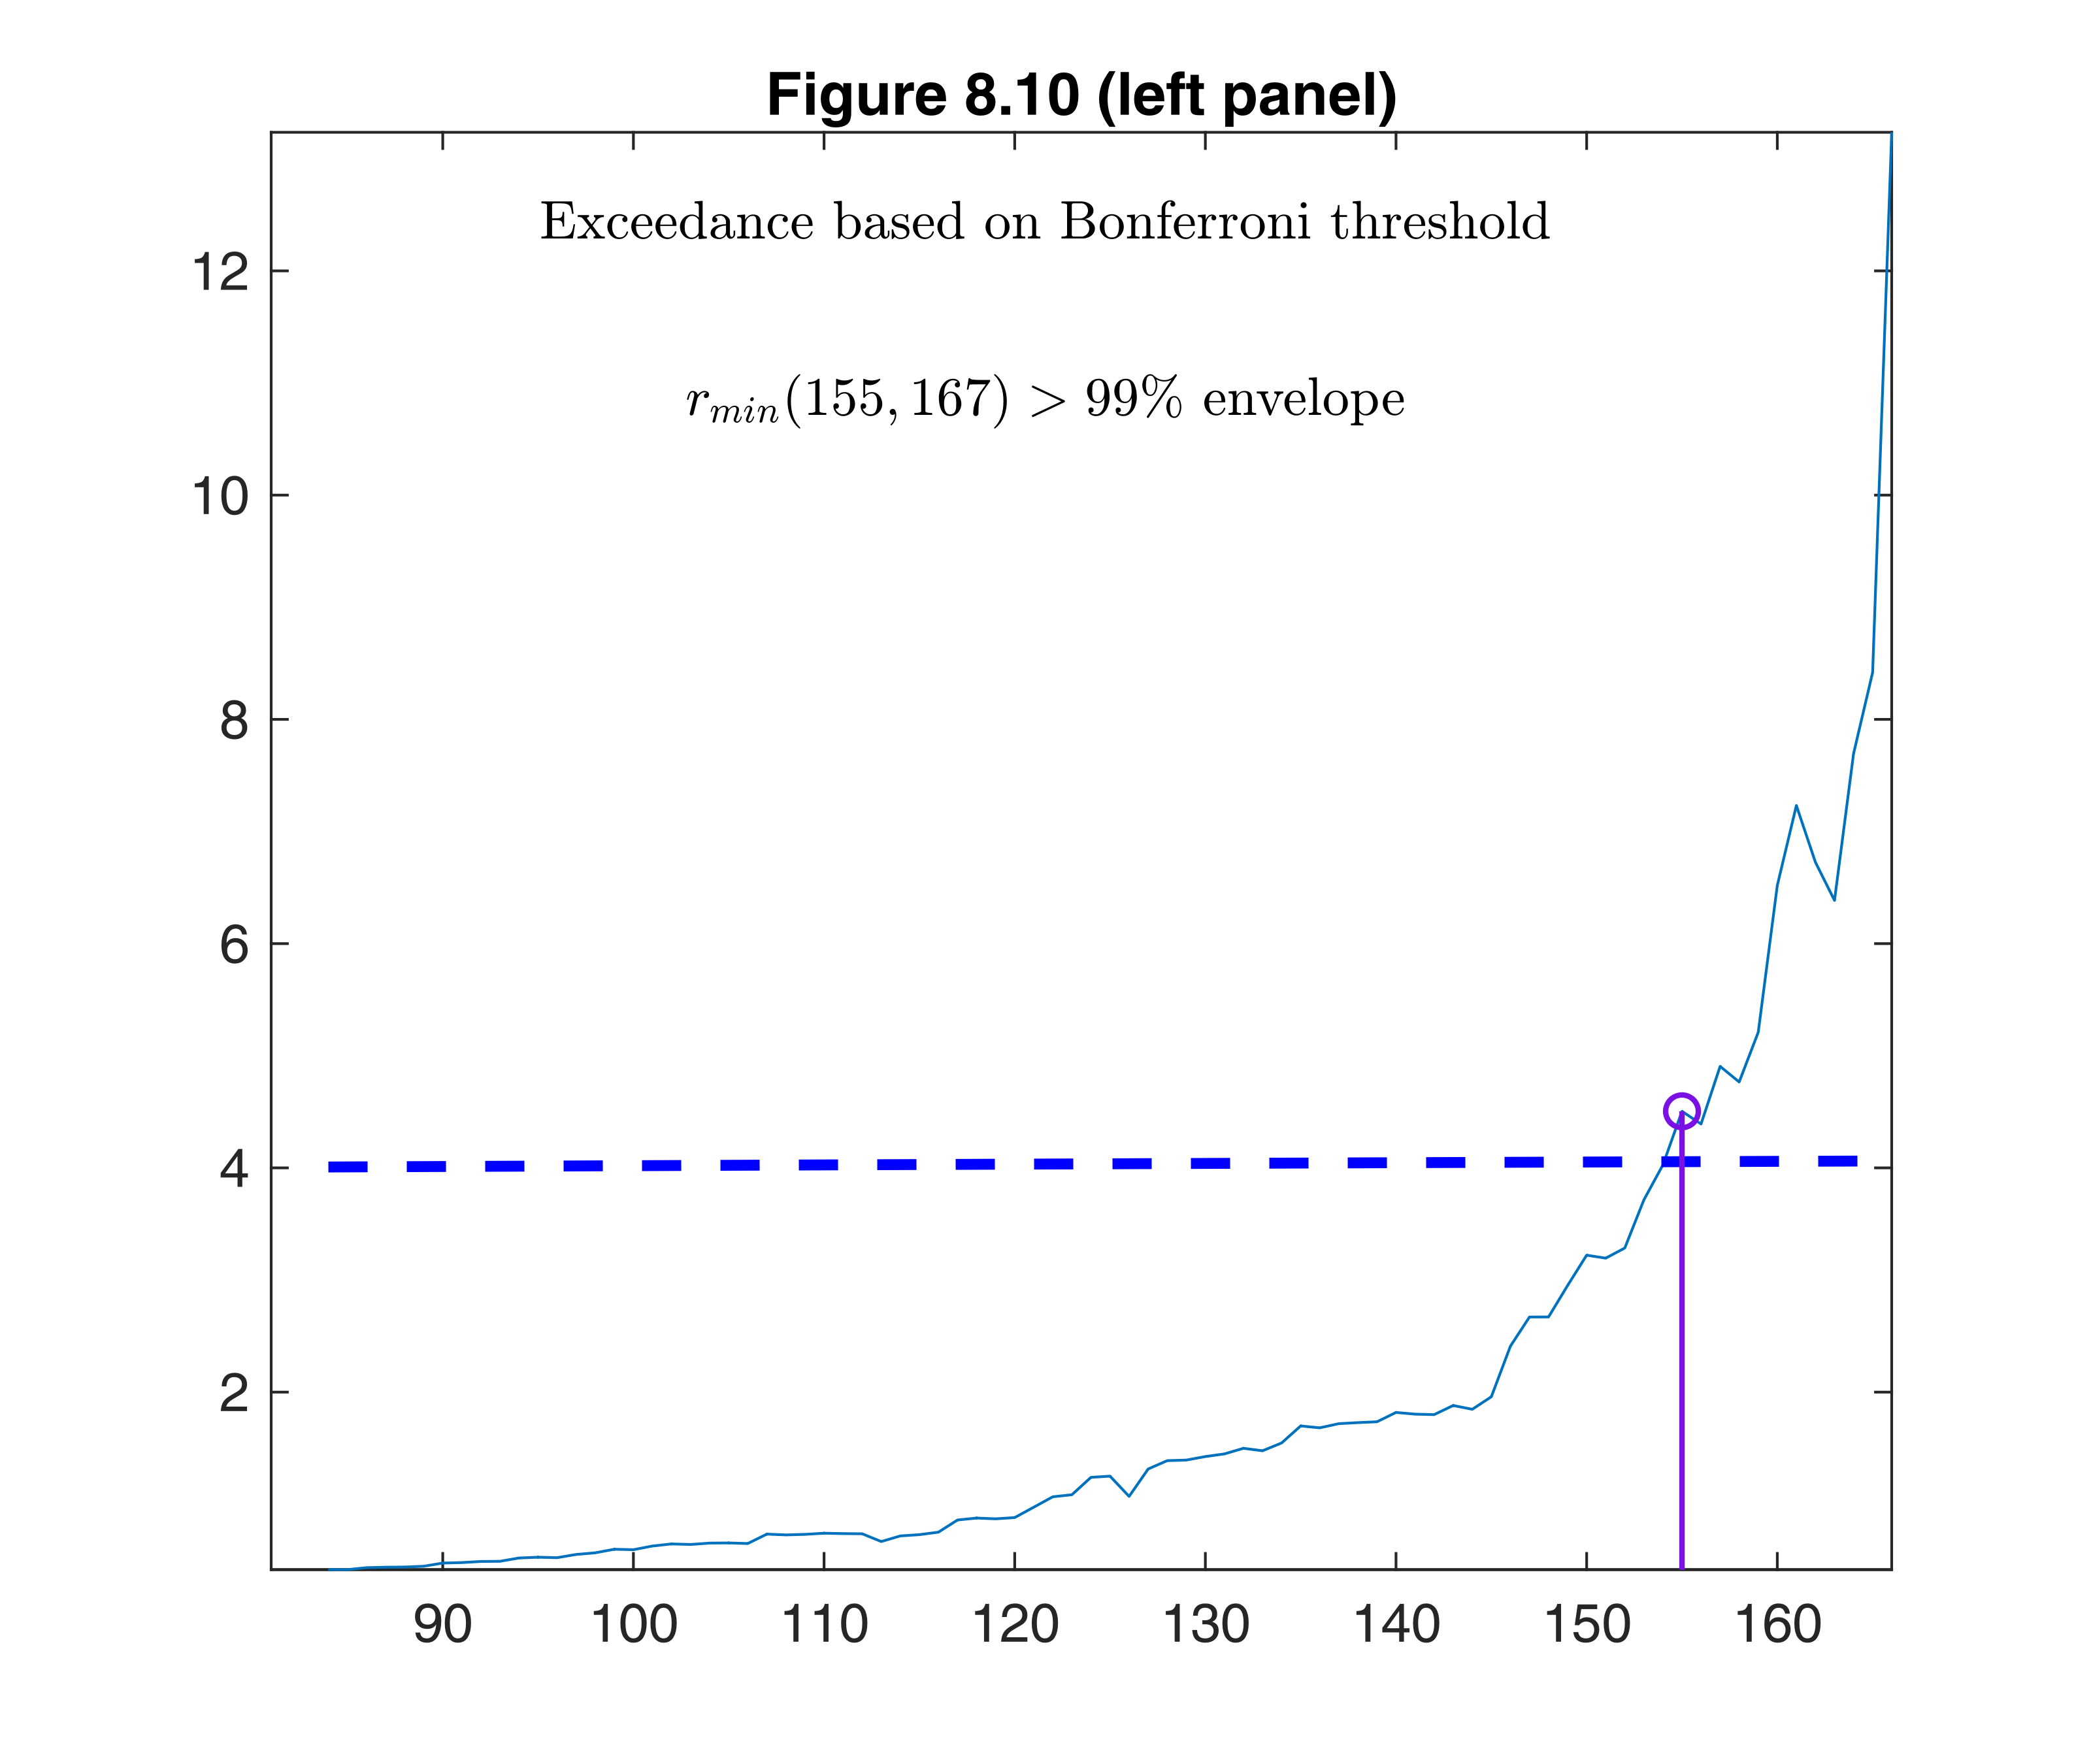

In [5]:
S202gi=sum(res02(u02gi))/(n02gi-2);

% X02gi = X matrix referred to good + intermediate units
X02gi=[ones(n02gi,1) X02(u02gi,:)];
% y02gi = y vector referred to good + intermediate units
y02gi=y02(u02gi);

% bayes = structure which contains prior information to be used in year
% 2003
bayes=struct;
bayes.beta0=b02g; % beta prior is beta based on g units
tau0=1/S202gi; % tau0 is based on g + i units
bayes.tau0=tau0;
R=X02g'*X02g; % R is based on g units
bayes.n0=n02gi; % n0 is based on g + i units
bayes.R=R;

% 2003 analysis
% Bayesian Forward Search, 2nd year
out03=FSRB(y03,X03,'bayes',bayes,'msg',0,'plots',1, ...
    'init',round(n03/2),'bonflev',bonflevB,'tag','fsrB2003');

fig=findobj(0,'tag','fsr_yXplot');
close(fig)

fig=findobj(0,'tag','fsrB2003');
figure(fig(1))
if prin ==1
    print -depsc  FSbonf2003.eps
else
    set(gcf,'Name', 'Figure 8.10 (left panel)');
    title('Figure 8.10 (left panel)')
end

## Create Figure 8.10 (right panel)


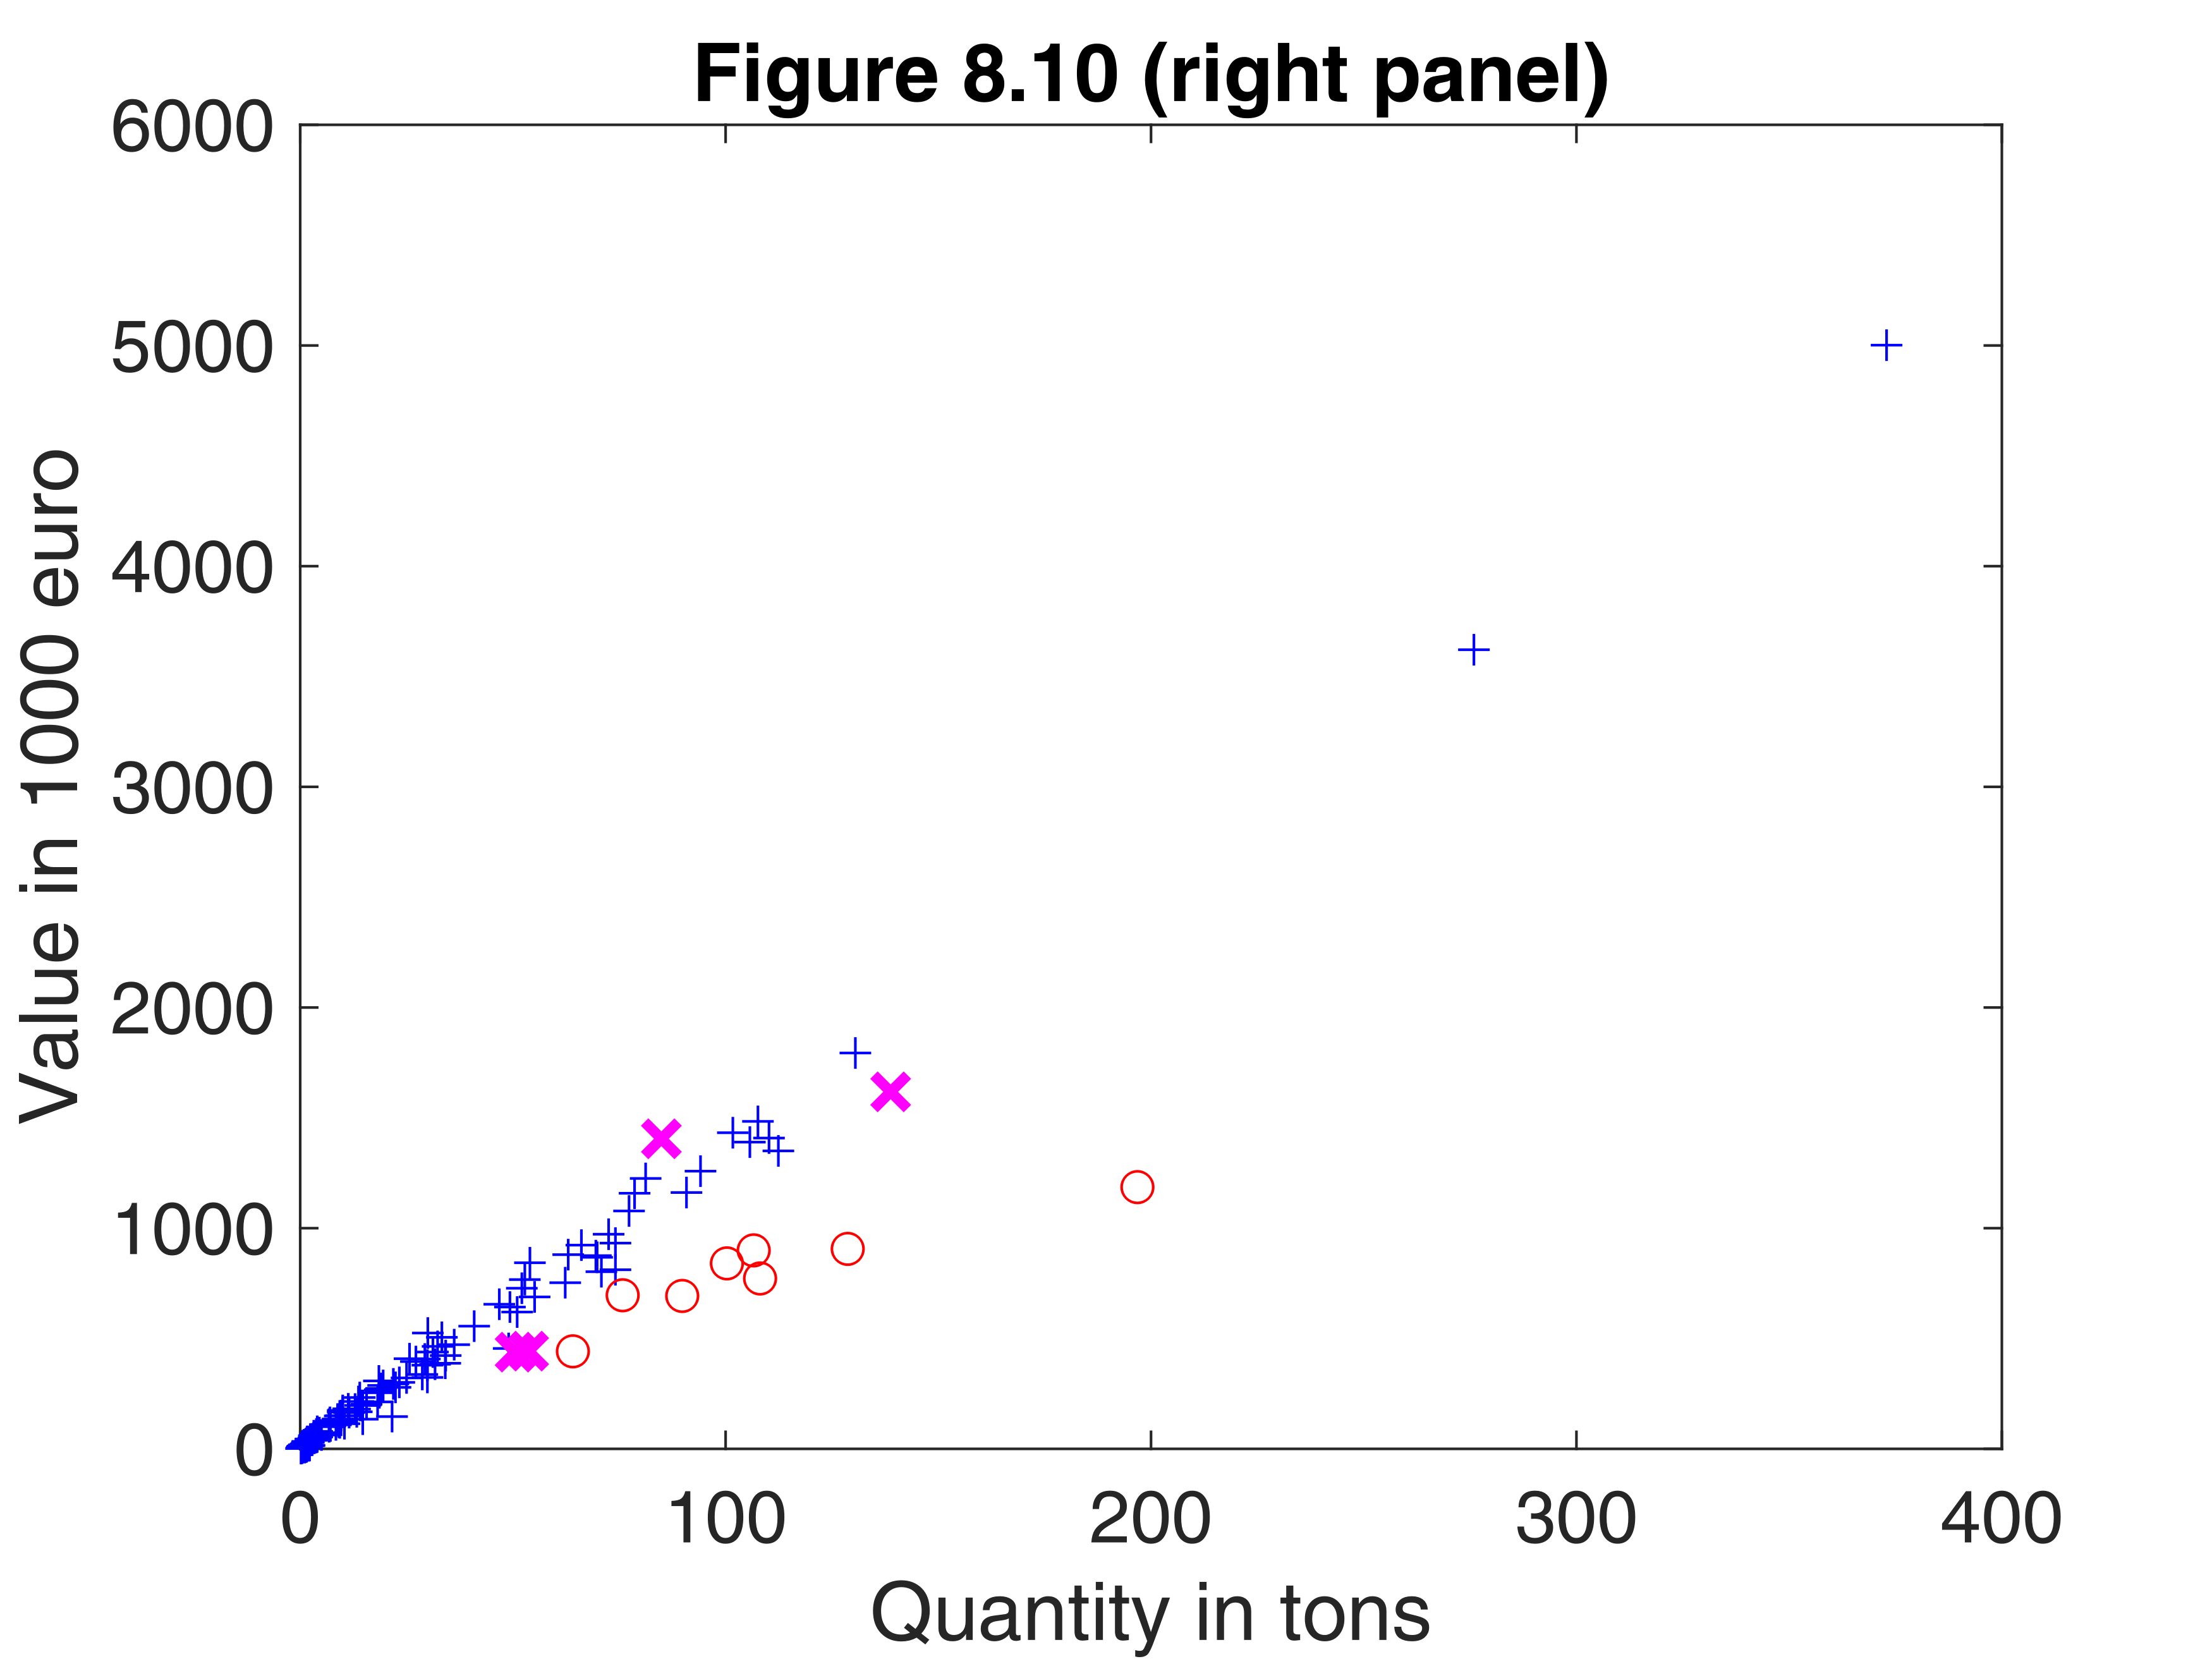

In [6]:
u03g=setdiff(seq03,out03.ListOut);
n03g=length(u03g);

% compute beta coefficient for year 2003 just using good units
X03g=[ones(n03g,1) X03(u03g,:)];
y03g=y03(u03g);
b03g=X03g\y03g;

res03=(y03-[ones(length(X03),1) X03]*b03g).^2;
res03o=res03(out03.ListOut);
sel=res03o<threshold^2;
% u03i = units to add to the good units subset (intermediate units)
u03i=out03.ListOut(sel);
% u03o =  outliers out of the threshold
u03o=out03.ListOut(~sel);
if ~isempty(u03i)
    u03gi=[u03g u03i];
else
    u03gi=u03g;
end
n03gi=length(u03gi);
X03gi=[ones(n03gi,1) X03(u03gi,:)];
y03gi=y03(u03gi,:);

% plotting section
figure
% good units, plotted as (+)
plot(X03(u03g)',y03(u03g)','Marker','+','LineStyle','none','Color','b')
hold('on')
% units below the threshold, plotted as (X)
plot(X03(u03i)',y03(u03i)','Marker','X','MarkerSize',9,'LineWidth',2,'LineStyle','none','Color','m')

% outliers, plotted as (O)
plot(X03(u03o)',y03(u03o)','Marker','o','LineStyle','none','Color','r')
set(gca,'FontSize',14)
xlabel('Quantity in tons')
ylabel('Value in 1000 euro')
title('2003');

if prin ==1
    print -depsc  FSres2003.eps
else
    title('Figure 8.10 (right panel)')
    set(gcf,"Name",'Figure 8.10 (right panel)')
end

## Create left panel of Figure 8.11

Definition of bayes structure (based on 2002 and 2003)



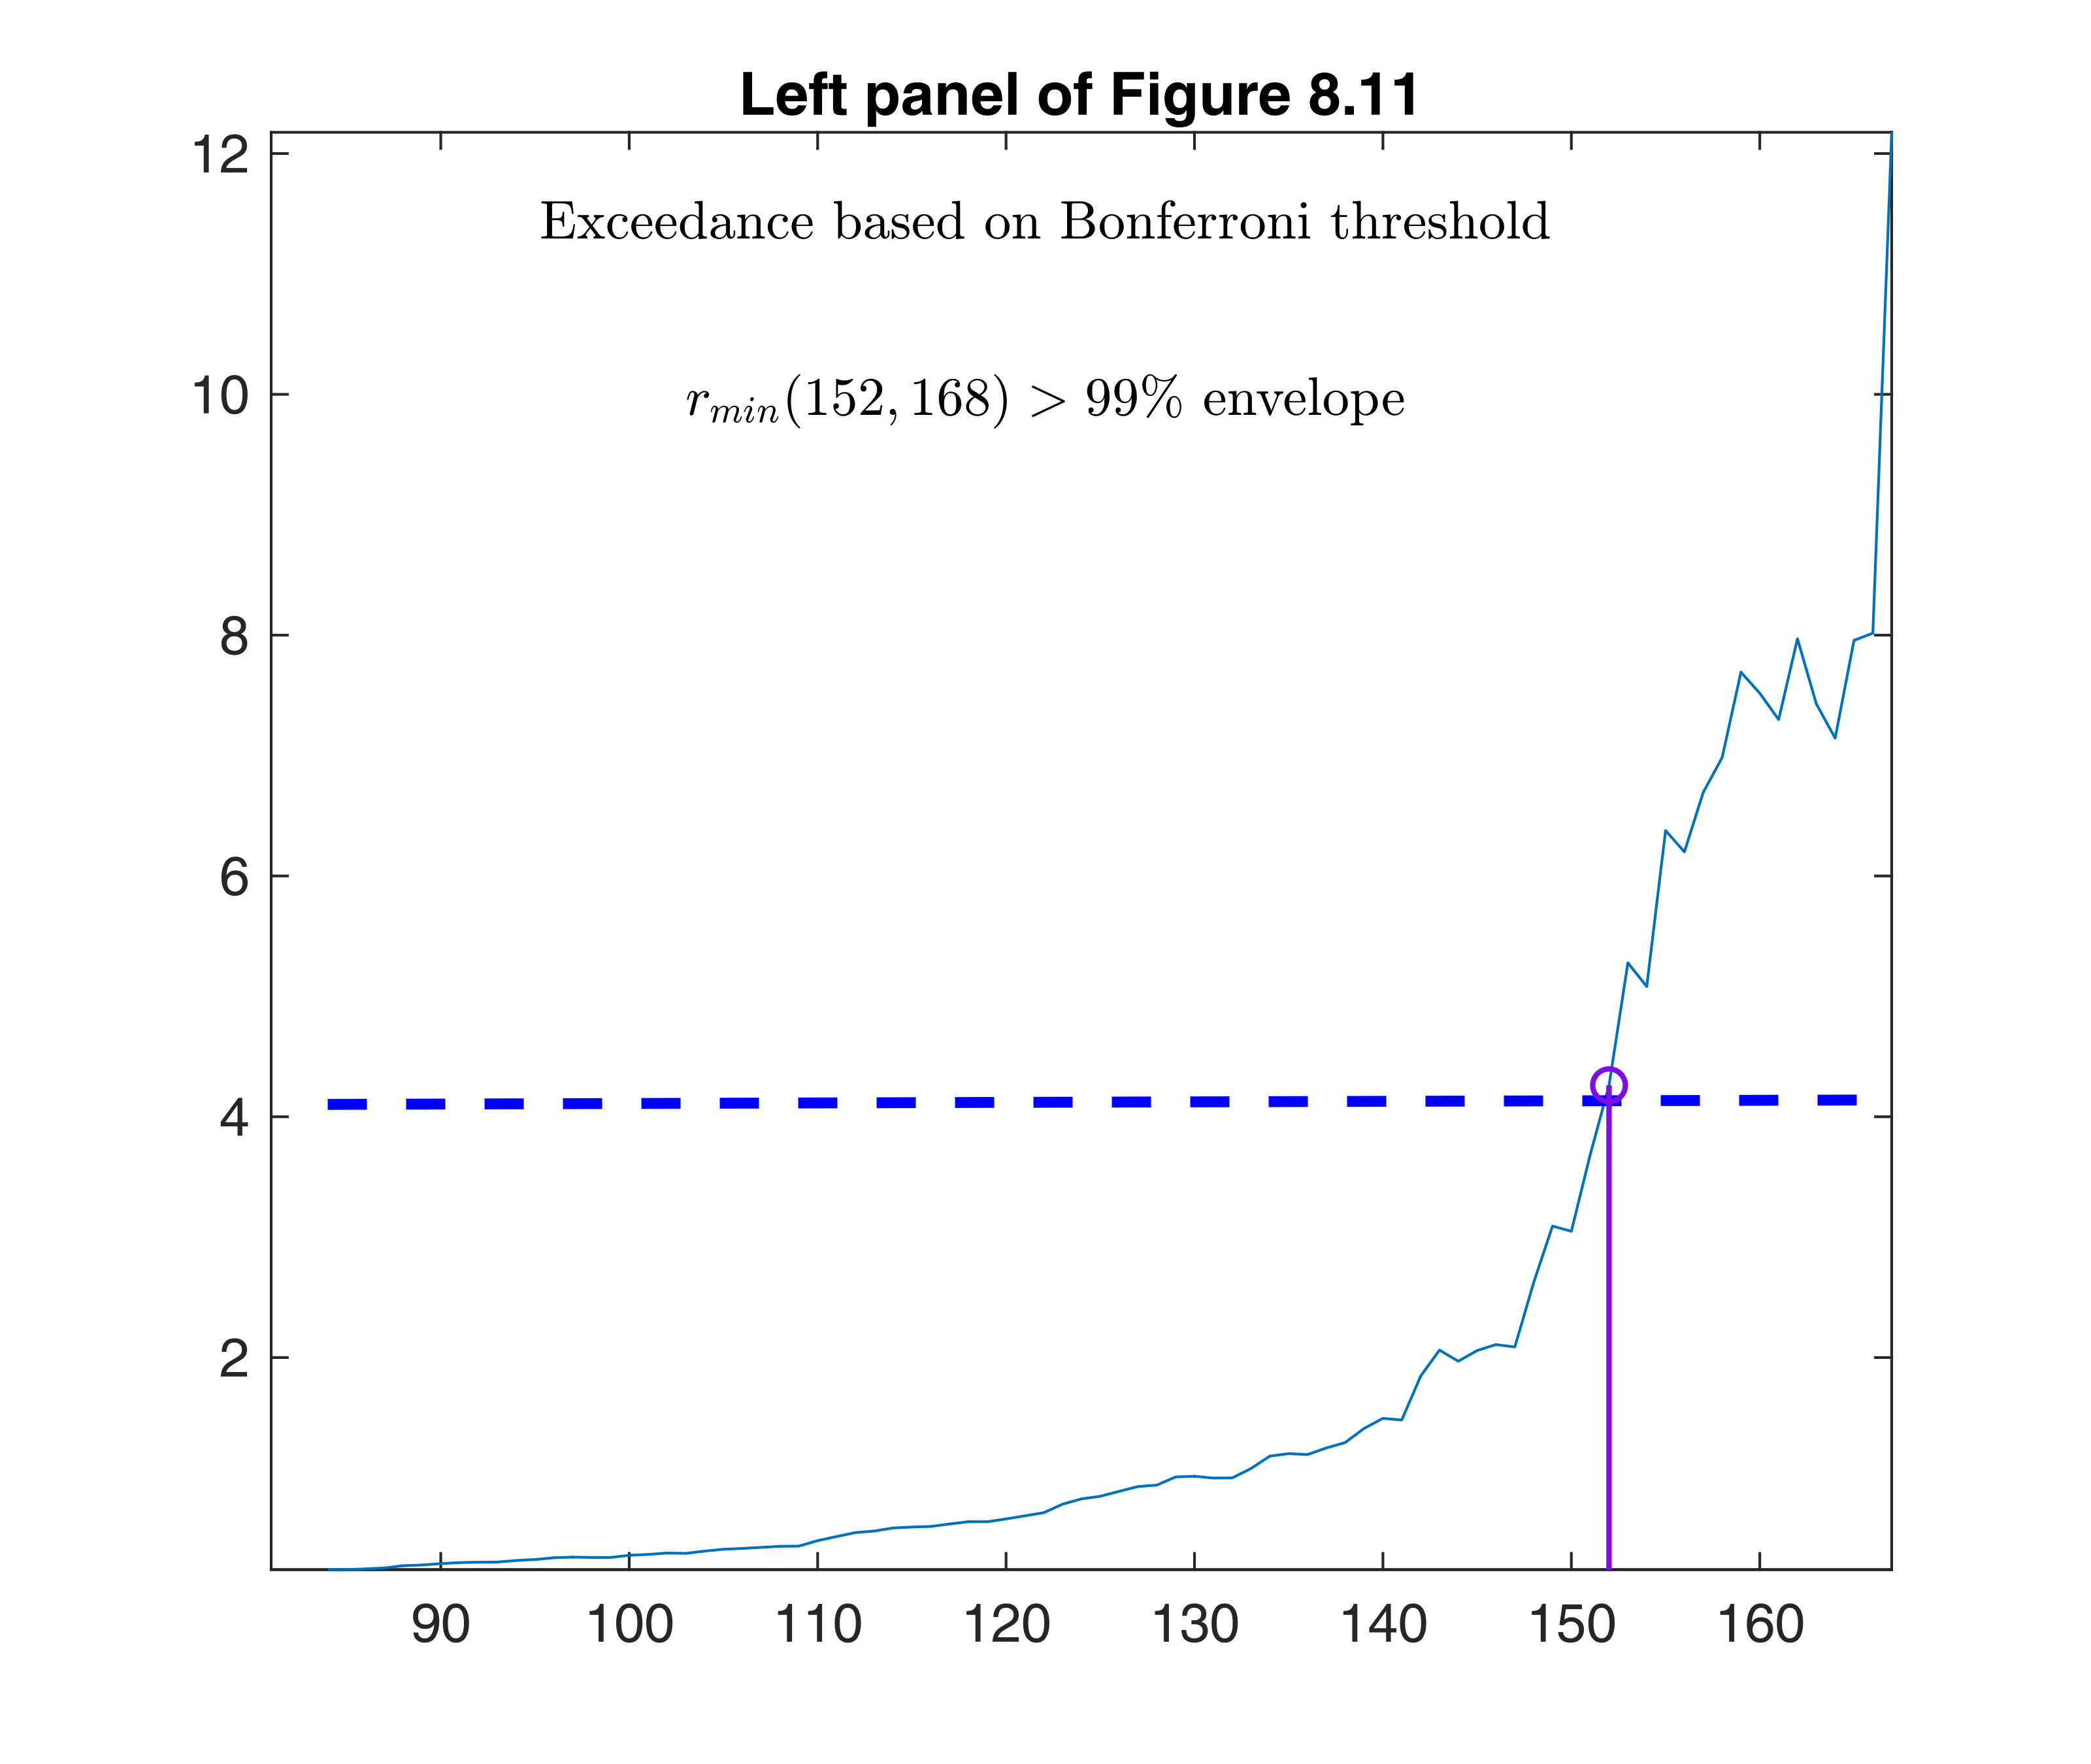

In [7]:
bayes=struct;
X02gX03g=[X02g; X03g];
y02gy03g=[y02g; y03g];
n02gn03g=n02g+n03g;
% b0203g prior estimate of beta for year 2004 is computed using good units
% for years 2002 and 2003
b0203g=X02gX03g\y02gy03g;

bayes.beta0=b0203g;
% R is just referred to good units for years 2002 and 2003
R=X02gX03g'*X02gX03g;
bayes.R=R;
% n0 is referred to g + i units in 2002 and 2003
bayes.n0=n02gi+n03gi;

X02giX03gi=[X02gi; X03gi];
y02giy03gi=[y02gi; y03gi];
% n02gin03gi = number of g+i units in 2002 and 2003
n02gin03gi=n02gi+n03gi;

% res = residuals for g+i units using b0203g
res=y02giy03gi-X02giX03gi*b0203g;
S203gi=sum(res.^2)/(n02gin03gi-2);
% estimate of tau is based on g + i units
tau0=1/S203gi;
bayes.tau0=tau0;

% Bayesian Forward Search, 3rd year
out04=FSRB(y04,X04,'bayes',bayes,'msg',0,'plots',1,'init',round(n04/2), ...
    'bonflev',bonflevB,'tag','fsrB2004');

fig=findobj(0,'tag','fsr_yXplot');
close(fig)

fig=findobj(0,'tag','fsrB2004');
figure(fig(1))
if prin==1
    print -depsc  FSbonf2004.eps
else
    set(gcf,'Name', 'Left panel of Figure 8.11');
    title('Left panel of Figure 8.11')
end

## Create right panel of Figure 8.11


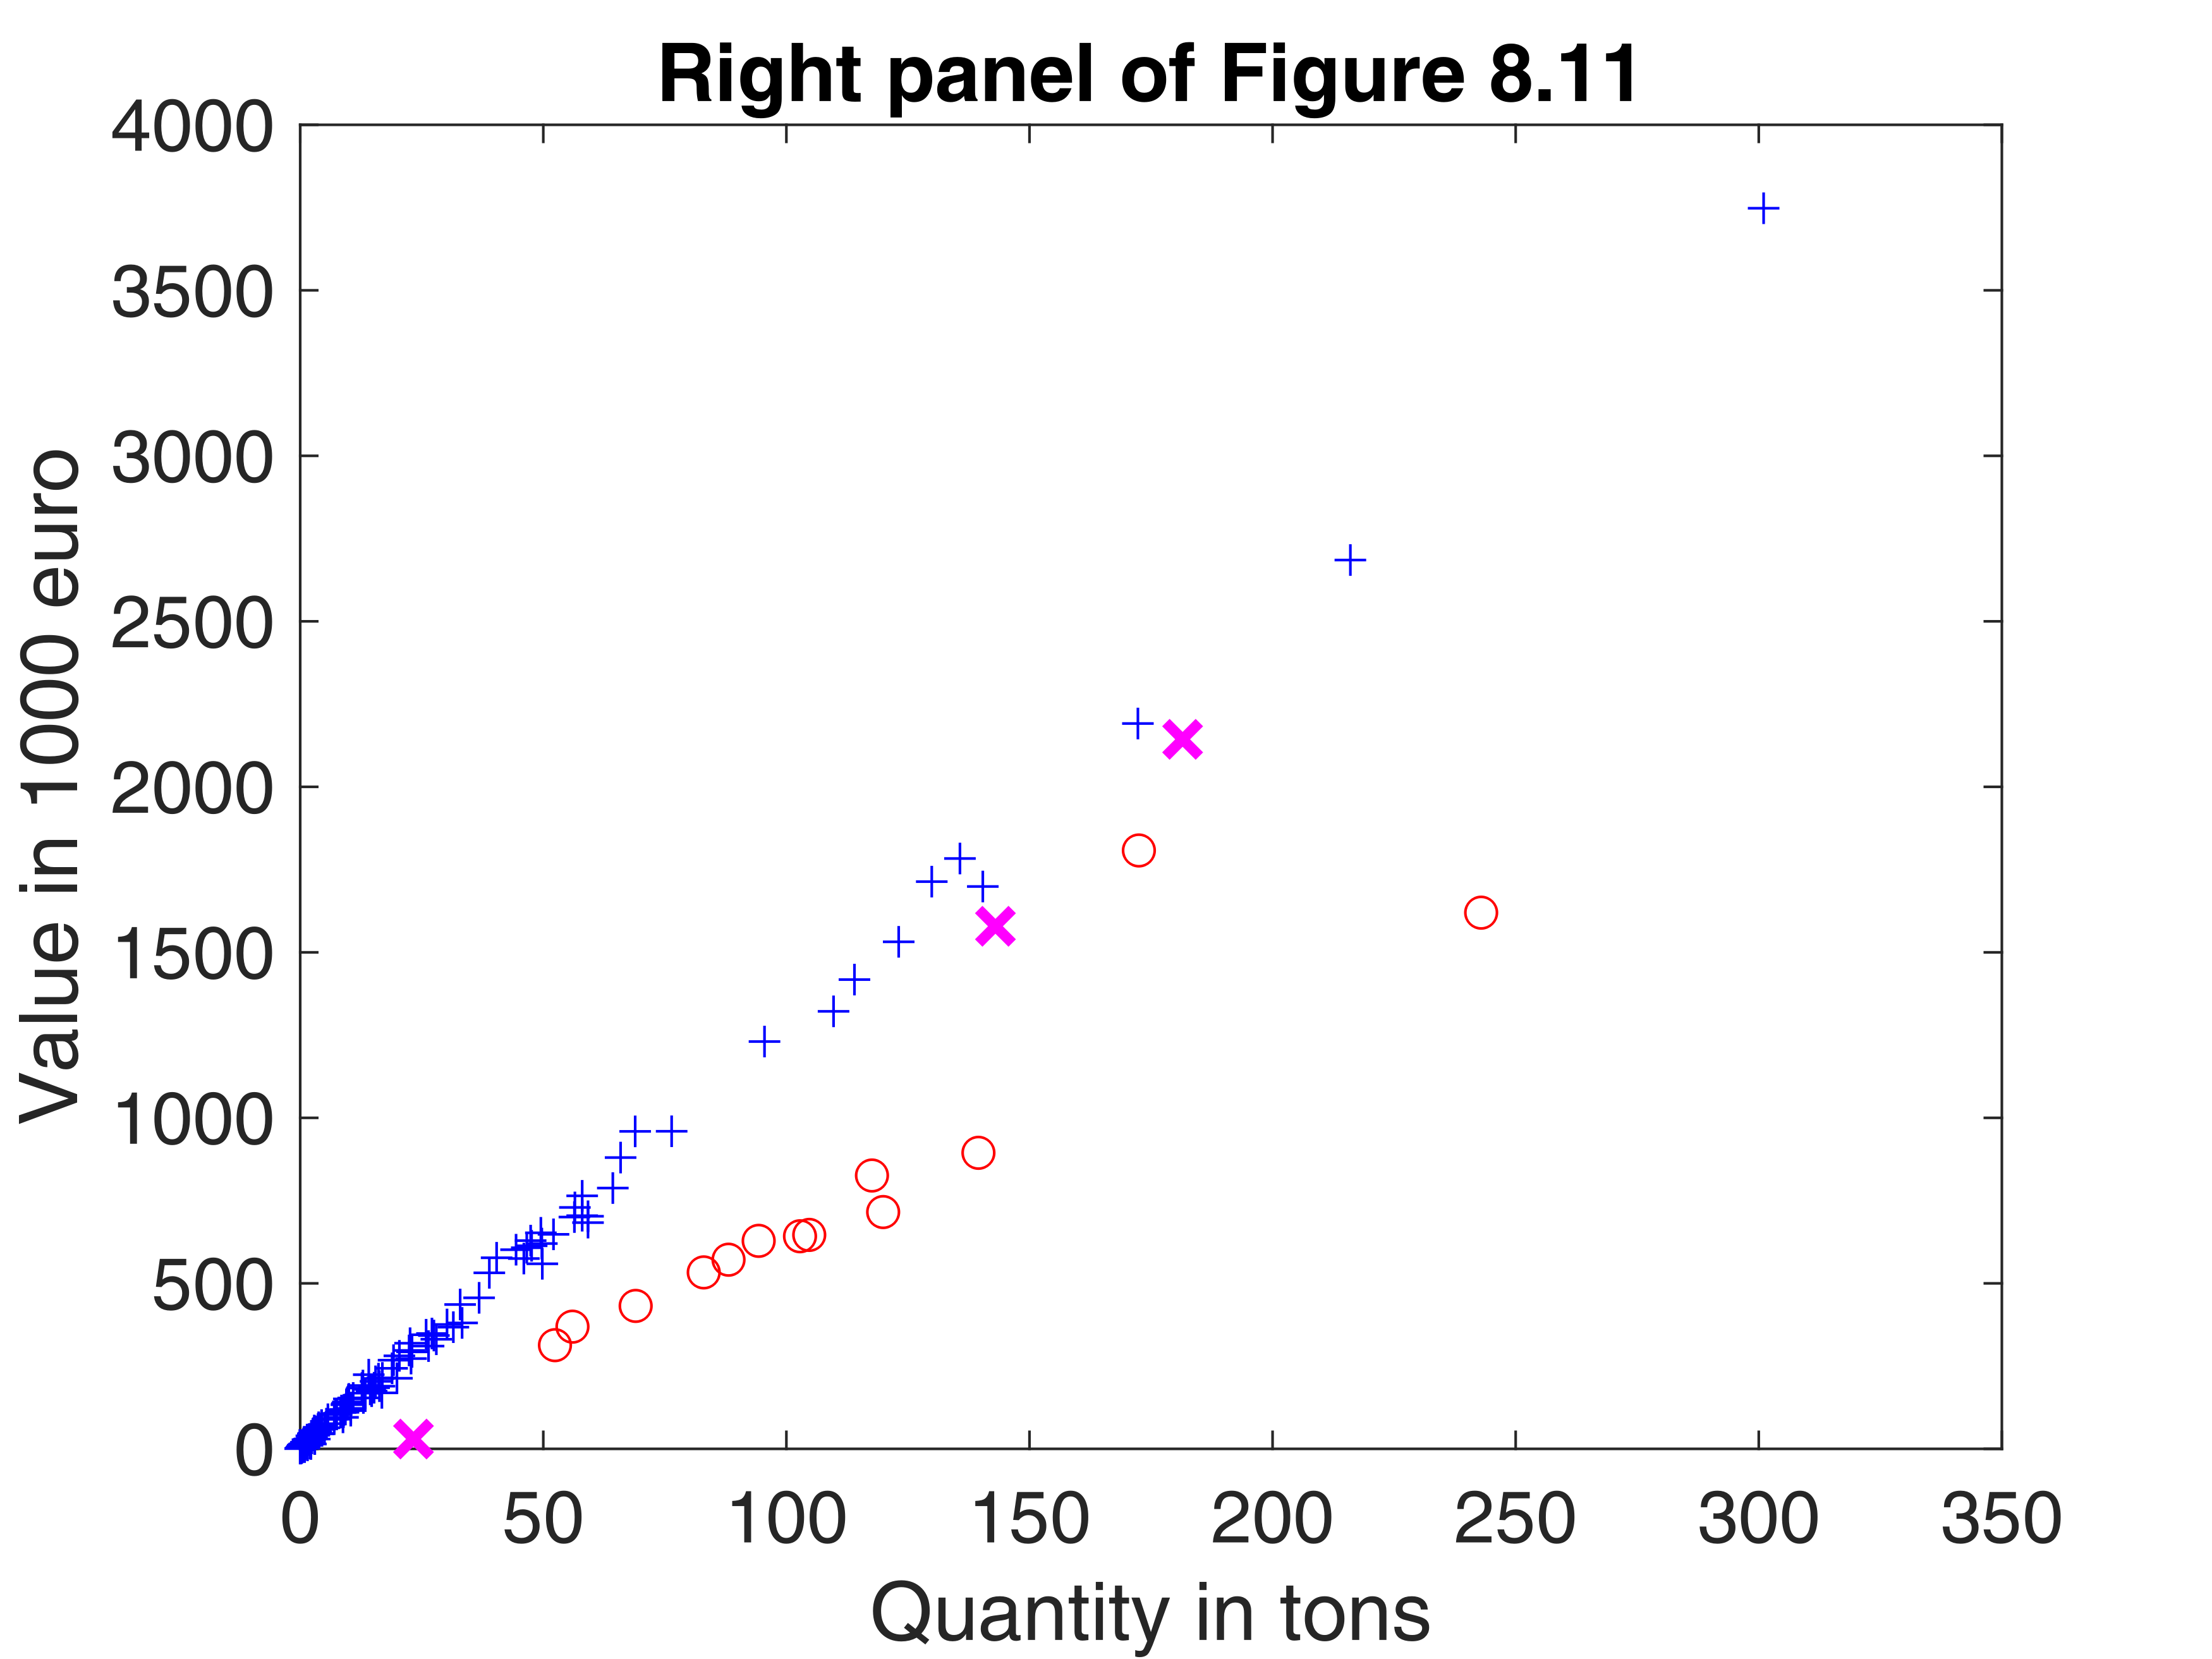

In [8]:
u04g=setdiff(seq04,out04.ListOut);
n04g=length(u04g);

X04g=[ones(n04g,1) X04(u04g,:)];
y04g=y04(u04g);
% b04g = beta based on good units for year 2004
b04g=X04g\y04g;

res04=(y04-[ones(length(X04),1) X04]*b04g).^2;
% res04o squared residuals for the tentative outliers
res04o=res04(out04.ListOut);
% we keep statistical units below the threshold
sel=res04o<threshold^2;
% u04i = units to add to the good units subset (intermediate units)
u04i=out04.ListOut(sel);
% u04o = units outliers out of the threshold
u04o=out04.ListOut(~sel);
if ~isempty(u04i)
    u04gi=[u04g u04i];
else
    u04gi=u04g;
end
n04gi=length(u04gi);

% plotting section
figure
% good units, plotted as (+)
plot(X04(u04g)',y04(u04g)','Marker','+','LineStyle','none','Color','b')
hold('on')
% units below the treshold, plotted as (X)
plot(X04(u04i)',y04(u04i)','Marker','X','MarkerSize',9,'LineWidth',2,'LineStyle','none','Color','m')

% outliers, plotted as (O)
plot(X04(u04o)',y04(u04o)','Marker','o','LineStyle','none','Color','r')
set(gca,'FontSize',14)
xlabel('Quantity in tons')
ylabel('Value in 1000 euro')
xlim([0 350])

if prin==1
    print -depsc FSres2004.eps;
else
    set(gcf,'Name', 'Right panel of Figure 8.11');
    title('Right panel of Figure 8.11')
end

In [9]:

%InsideREADME